In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#data = pd.read_excel("project_df_7factor.csv")
data =   pd.read_csv("project_df_7factor.csv")

In [ ]:
data

In [ ]:
Z_table_mean = data.groupby("TICKER").mean()

In [ ]:
Z_table_mean

In [ ]:
Z_table = Z_table_mean.apply(lambda x: (x - x.mean()) / x.std())
Z_table.fillna(0,inplace=True)

In [ ]:
Z_table["Z_score"] = ((Z_table.sum(axis = 1) - 2*Z_table["divyield"]))

Z_table.sort_values("Z_score", ascending = False, inplace = True)

In [8]:
Z_table.head(10)

,bm,roe,cash_ratio,ptb,pcf,curr_ratio,divyield,quarterly_return,Z_score
TICKER,,,,,,,,,
FB,-0.926656,-0.058489,5.844937,0.081713,1.126092,5.843921,0.000000,1.861885,13.773401
GOOG,-0.793941,0.114578,3.952892,0.076460,0.978791,3.930755,0.000000,1.047348,9.306883
NVDA,-0.477809,0.115645,1.527002,0.335230,2.144890,1.653791,-1.130176,2.647727,9.076652
MA,-1.142563,0.887063,0.131109,2.223538,1.384835,-0.038239,-1.730139,2.229412,7.405294
ADBE,-0.815909,0.103820,0.972096,0.583069,1.047579,0.681541,-2.005389,0.507609,5.085194
NFLX,-1.055876,0.153806,0.175607,2.287506,-0.758493,-0.096422,0.000000,4.073831,4.779959
QCOM,-0.666536,-0.057228,1.830293,0.266203,1.523230,1.778976,-0.308641,-0.579209,4.404371
CRM,-1.139918,-0.435406,-0.252274,1.490769,3.254273,-0.564876,0.000000,1.621020,3.973587
GILD,-1.024570,0.441850,1.568710,1.076655,-0.546939,1.876098,0.362581,0.866259,3.895482


In [9]:
stocks = Z_table.head(10)

In [10]:
stocks

,bm,roe,cash_ratio,ptb,pcf,curr_ratio,divyield,quarterly_return,Z_score
TICKER,,,,,,,,,
FB,-0.926656,-0.058489,5.844937,0.081713,1.126092,5.843921,0.000000,1.861885,13.773401
GOOG,-0.793941,0.114578,3.952892,0.076460,0.978791,3.930755,0.000000,1.047348,9.306883
NVDA,-0.477809,0.115645,1.527002,0.335230,2.144890,1.653791,-1.130176,2.647727,9.076652
MA,-1.142563,0.887063,0.131109,2.223538,1.384835,-0.038239,-1.730139,2.229412,7.405294
ADBE,-0.815909,0.103820,0.972096,0.583069,1.047579,0.681541,-2.005389,0.507609,5.085194
NFLX,-1.055876,0.153806,0.175607,2.287506,-0.758493,-0.096422,0.000000,4.073831,4.779959
QCOM,-0.666536,-0.057228,1.830293,0.266203,1.523230,1.778976,-0.308641,-0.579209,4.404371
CRM,-1.139918,-0.435406,-0.252274,1.490769,3.254273,-0.564876,0.000000,1.621020,3.973587
GILD,-1.024570,0.441850,1.568710,1.076655,-0.546939,1.876098,0.362581,0.866259,3.895482


In [11]:
## Ankit - Z Score graph

In [ ]:
import yfinance as yf
for i in Z_table.index:
    try:
        print(i)
        Z_table.loc[i,"Sectors"] =  yf.Ticker(i).info['sector']
    
    except:
        Z_table.loc[i,"Sectors"] =  "Other"

Z_table["Z_score_normalize"] = Z_table["Z_score"].apply(lambda x: (x - Z_table["Z_score"].mean()) / Z_table["Z_score"].std())

In [21]:
Z_table.to_csv("Z_score.csv")

In [22]:
Z_table_csv = pd.read_csv("Z_score.csv")
Z_table_csv.set_index("TICKER", inplace = True)

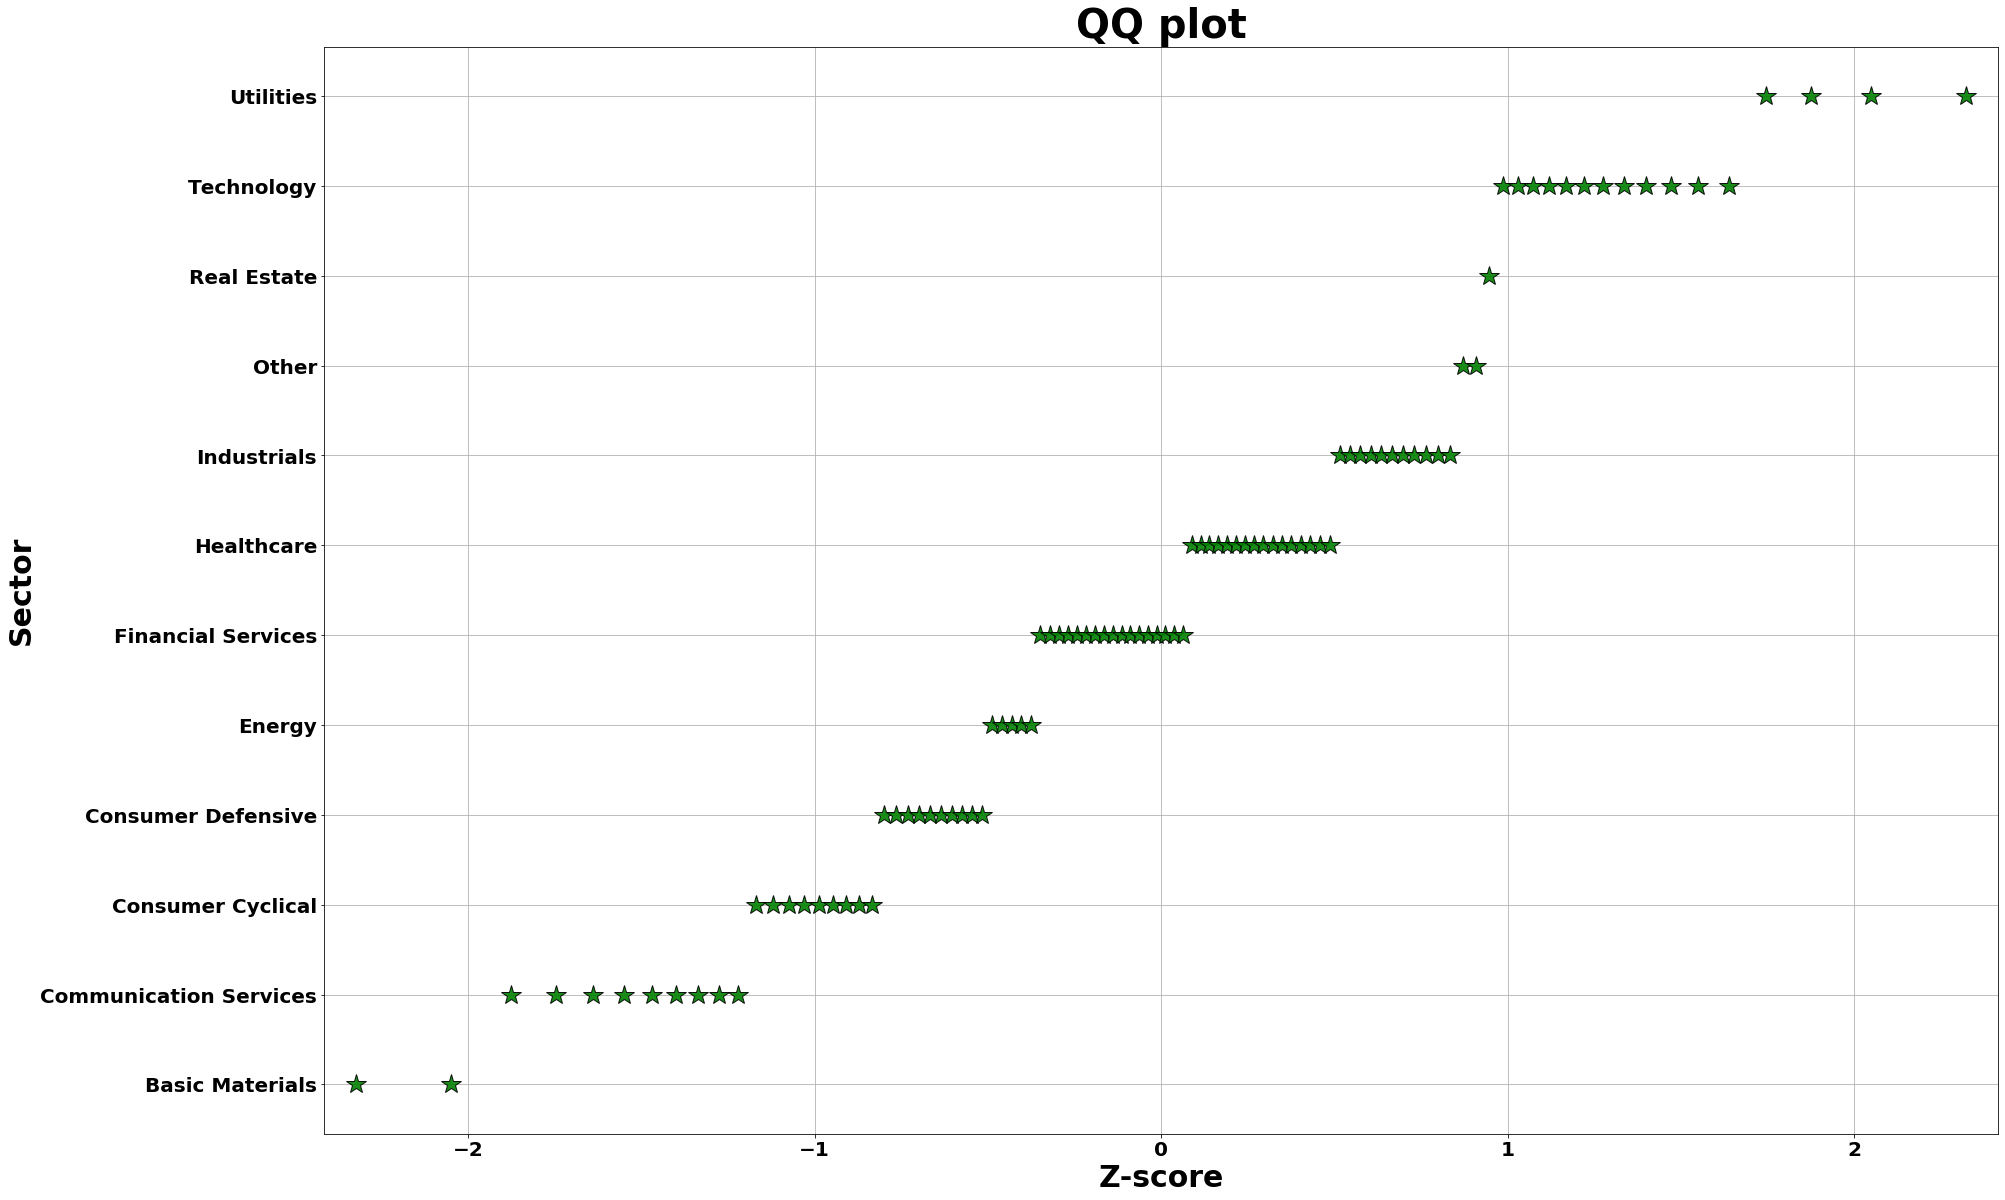

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
N, M = 30, 20
fig, ax = plt.subplots(figsize=(N, M))
sample1 = stats.norm.rvs(5, size=1000)
sample2 = stats.norm.rvs(10, size=1000)
sm.qqplot(Z_table_csv["Sectors"],ax=ax,marker='*', markerfacecolor= "green", markeredgecolor='k',alpha = 0.9,markersize=20.9)
plt.xlabel("Z-score", fontsize=30,fontweight = 'bold')
plt.ylabel("Sector", fontsize=30,fontweight = 'bold')
plt.xticks(fontsize=20,fontweight = 'bold')
plt.yticks(fontsize=20,fontweight = 'bold')
plt.title("QQ plot",fontsize=40,fontweight = 'bold')
plt.grid()
plt.show()